## **3. Interpolación**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se conoce la presión de vapor del agua a las siguientes temperaturas: 

In [83]:
Agua = pd.Series(['Temperatura [°C]', 'Presión [bar]'])
Temperatura_agua = pd.Series([99.6, 120.21, 143.61, 158.83, 170.41, 179.88])
Presion_agua = pd.Series([1, 2, 4, 6, 8, 10])

pd.DataFrame({'Presión de vapor [bar]': Presion_agua, 'Temperatura [K]': Temperatura_agua + 273.15})

,Presión de vapor [bar],Temperatura [K]
0,1,372.75
1,2,393.36
2,4,416.76
3,6,431.98
4,8,443.56
5,10,453.03


**3. Obtener la temperatura del agua a una presión de 3 bar. Elegir un método de interpolación, justificar su elección y graficar resultados.**

#### Ecuación general del método de Lagrange mejorado:

$$ P_n(x)=\sum^n_{i=0}f(x_i)\frac{L(x)w_i}{x-x_i}=L(x)\sum^n_{i=0}f(x_i)\frac{w_i}{x-x_i},$$

#### Ecuación del polinomio L (Cte dentro de la sumatoria):

$$ L(x)=(x-x_0)(x-x_1)\ldots(x-x_n)$$ 

#### Ecuación de los pesos baricéntricos:

$$ w_i=\prod^n_{\substack{k=0 \\k\neq i}}\frac{1}{x_i-x_k}, \text{  para todo  }i=0;1;\ldots;n. $$ 

In [84]:
#Generamos un array llamado data que almacene la información provista por la consigna:
data = [[1,372.75],[2,393.36],[4,416.76],[6,431.98],[8,443.56],[10,453.03]]
#(x,y) = (P,T)

In [85]:
def lagrangeMejorado_GS1(x,data):
    w_lista = []
    l = 1
    sumatoria = 0
    for i in range(0, len(data)):
        l *= (x - data[i][0])
        w = 1
        for j in range(0, len(data)):
            if j != i:
                w *= 1 / (data[i][0] - data[j][0])
        w_lista.append(w)
    for i in range(0,len(data)):
        sumatoria += data[i][1] * (w_lista[i] / (x - data[i][0]))
    return l * sumatoria

In [86]:
df = pd.DataFrame(data, columns = ['x', 'y'])

In [87]:
def LagrangeMejorado_práctica(x,df):
    N=len(df)
    W=np.zeros(N)
    P=0
    L=1
    PB=0
    for i in range (0,N):
        if x==df['x'][i]:         #Para que no divida por cero .
            return df['y'][i]
        L*=x-df['x'][i] #Productoria que define a L
        w=1
        for j in range (0,N):
            if j != i:
                w*=1/(df['x'][i]-df['x'][j])
        W[i]=w
        P+=(w*df['y'][i])/(x-df['x'][i])
    PB=L*P
    return PB,L,W, print("El valor despejado de T[k] con el método programado en clase es: ",PB)

In [88]:
#Cálculo del valor de T[K] con la función vista en la clase práctica.
x = 5
LagrangeMejorado_práctica(x,df)
#-------------------------------------------------------------------------------------------------------------------------#
print("\n")
#-------------------------------------------------------------------------------------------------------------------------#
#Cálculo del valor de T[K] con la función programada por el grupo.
t = lagrangeMejorado_GS1(x,data)
print("El valor despejado de T[k] con el método programado por el grupo es: ",t)

El valor despejado de T[k] con el método programado en clase es:  424.8667410714287


El valor despejado de T[k] con el método programado por el grupo es:  424.8667410714287


Text(0.5, 1.0, 'Grafico Lagrange(mejorado)')

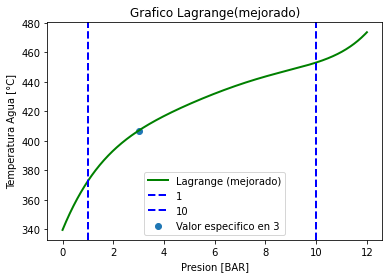

In [89]:
# Ploteo hecho por el grupo

plt.xlabel("Presion [BAR]")
plt.ylabel("Temperatura Agua [°C]")

ejeX = np.linspace(0, 12, 500)
ejeY = []
for xi in ejeX:
    ejeY.append(lagrangeMejorado_GS1(xi, data))

plt.plot(ejeX, ejeY, linewidth = 2, color = "green")
plt.scatter(3, lagrangeMejorado_GS1(3, data))
plt.axvline(1, linewidth=2, color='blue',linestyle='dashed')
plt.axvline(10, linewidth=2, color='blue',linestyle='dashed')
plt.legend(["Lagrange (mejorado)", "1", "10", "Valor especifico en 3"], fontsize = 10)
plt.title("Grafico Lagrange(mejorado)")

## **Integración numérica**

La corriente metanol-agua (F1) debe ser precalentada previo al ingreso del tanque de mezclado. Para ello se utiliza vapor de agua. El intercambio calórico se lleva a cabo en un intercambiador de tubos concéntricos. <br>
La longitud del equipo está dada por la siguiente ecuación: $L = \frac{m}{D\pi}\int_{T_1}^{T} \frac {Cp(T)}{h(T_s-T)}\,dT$<br>
Siendo: <br>m: caudal másico<br>D: diámetro del tubo<br>
h: coeficiente de transferencia de calor<br>
Ts: temperatura del vapor de agua<br>
Cp: calor específico<br><br>

$h = \alpha(kCp)^{0.33}$<br><br>
El calor específico está dado por la siguiente expresión:<br>
$Cp(T) = aT^3+bT^2+cT+d$  

In [90]:
#DATOS DEL PROBLEMA 
diametro = 0.08 #m Diámetro del tubo
tEntrada = 5 #°C Temperatura de ingreso de la corriente F1
tSalida = 15 #°C Temperatura de salida de la corriente F1

#Coeficientes para h 
kappa = 0.0086
alpha = 3630.4

#Coeficientes del Cp para la corriente F1
a = 0.00000006
b = 0.000006
c = 0.0008
d = 0.05806

#Información del vapor de agua
Presion_vapor = 3 #bar (Del ejercicio 3, se saca que la temperatura del agua es:)
temperaturaAgua = 424.8667410714287
caudalMasicoF1 = 56000 # kg/h (Del ejercicio 1)

In [91]:
#Funciones que se van a utilizar
def cp(t):
    return ((a * t**3) + (b * t**2) + (c * t) + d)

def h(t):
    return (alpha * (kappa * cp(t))**0.33) 

def f(t):
    return (cp(t) / h(temperaturaAgua - t))

In [92]:
#Metodo de Simpson Compuesto hecho por el grupo---------------------------------------------------------------------------#

In [93]:
def simpsonCompuesto_GS1(tEntrada,tSalida,n):
    paso = (tSalida-tEntrada) / (2*n)
    sc = (1/3) * paso * f(tEntrada) + (1/3)* paso *f(tSalida)
    for i in range(1, 2*n):
        if i % 2 == 0:
            sc += (2/3)* paso *f(tEntrada + i * paso)
        if i % 2 != 0:
            sc += (4/3)* paso *f(tEntrada + i * paso)
    return sc

In [94]:
print("la integracion mediante GS1-Simpson Compuesto es: ", simpsonCompuesto_GS1(5, 15, 1000))
print("y el resultado es: ", (caudalMasicoF1 / (diametro*np.pi)) * simpsonCompuesto_GS1(5, 15, 1000))

la integracion mediante GS1-Simpson Compuesto es:  0.0004975672392314942
y el resultado es:  110.86639990199188


In [95]:
#Optimización del método de Simpson compuesto mediante el uso de booleans en reemplazo del operador " % "

In [96]:
def simpsonCompuesto_GS1_optimizado(tEntrada,tSalida,n):
    par = False
    paso = (tSalida-tEntrada) / (2*n)
    sc = (1/3) * paso * f(tEntrada) + (1/3)* paso *f(tSalida)
    for i in range(1, 2*n):
        if(par):
            sc += (2/3)* paso *f(tEntrada + i * paso)
            par = False
        else:
            sc += (4/3)* paso *f(tEntrada + i * paso)
            par = True
    return sc

In [97]:
print("la integracion mediante GS1-Simpson Compuesto es: ", simpsonCompuesto_GS1_optimizado(5, 15, 1000))
print("y el resultado es: ", (caudalMasicoF1 / (diametro*np.pi)) * simpsonCompuesto_GS1_optimizado(5, 15, 1000))

la integracion mediante GS1-Simpson Compuesto es:  0.0004975672392314942
y el resultado es:  110.86639990199188


In [98]:
#Cuadratura de Gauss-Legendre---------------------------------------------------------------------------------------------#

In [99]:
def gaussLegendre(tMax, tMin, f, n):
    resultado = 0 
    sumatoria = 0
    ti, ci = np.polynomial.legendre.leggauss(n)
    for i in range (0, n):
        tActual = ((tMax - tMin) / 2) * ti[i] + ((tMin + tMax) / 2)
        sumatoria += ci[i] * (f(tActual))
    resultado = ((tMax-tMin)/2) * sumatoria 
    return resultado

In [100]:
print("La integracion mediante Gauss Legendre es: ", gaussLegendre(15, 5, f, 10))
print("y el resultado es: ", (caudalMasicoF1 / (diametro * np.pi)) * gaussLegendre(15, 5, f, 10))

La integracion mediante Gauss Legendre es:  0.0004975672392314943
y el resultado es:  110.86639990199191


In [101]:
# Funcion prueba (for debugging) -----------------------------------------------------------------------------------------#

In [102]:
#def Gauss2(tMax, tMin, f,cp, h, a, b, c, d, alpha, k, n ): #Viejo, antes de prolijar.
#    resultado=0 
#    sumatoria=0
#    ci, ti= np.polynomial.legendre.leggauss(n)
#    for i in range (0, n):
#        tActual= ((tMax-tMin)/n) * ti[i] + (tMin+tMax)/n
#        #print(((tMax-tMin)/n) * ti[i])
#        #print ((tMin+tMax)/n)
#        #print (tActual)
#        sumatoria+= ci[i] * (f(cp, h, a, b, c, d, alpha, k, tActual))
#        #print(sumatoria)
#        #print(f(cp, h, a, b, c, d, alpha, k, tActual))
#        
#        
#    resultado= ((tMax-tMin)/n) * sumatoria 
#    return resultado

In [103]:
#print("la integracion mediante Gauss Legendre es: ", Gauss2(15, 5, f,cp, h, a, b, c, d, alpha, k, 4))

In [104]:
#PRUEBA CON OTROS METODOS DE LA CATEDRA-----------------------------------------------------------------------------------#

# Comprobacion con otros metodos, programados por la catedra.

In [105]:
def PuntoMedioC(A,B,n):
    H = (B-A) / n  
    Q = 0
    for i in range (0,n):
        Q += H * f(A+i*H+H/2)
    return Q
    
def q(x,A,B):
    H = B-A
    return f(A+H/2)*x/x

In [106]:
print("la integracion mediante Punto medio compuesto es: ", PuntoMedioC(5, 15, 1000))
print("y el resultado es: ", (caudalMasicoF1 / (diametro*np.pi)) * PuntoMedioC(5, 15, 1000))

la integracion mediante Punto medio compuesto es:  0.000497567238604696
y el resultado es:  110.86639976233064


In [107]:
def TrapecioC(A,B,n):
    H = (B-A) / n
    Q = (H/2) * f(A)     
    for i in range (1,n):
        Q += H * f(A+i*H) 
    Q += (H/2) * f(B)
    return Q
    
def q(x,a,b):
    H = B-A
    F01 = (f(B) - f(A)) / H 
    return f(A) + F01 * (x-A)

In [108]:
print("la integracion mediante trapecios compuestos es: ", TrapecioC(5, 15, 1000))
print("y el resultado es: ", (caudalMasicoF1 / (diametro*np.pi)) * TrapecioC(5, 15, 1000))

la integracion mediante trapecios compuestos es:  0.0004975672404850919
y el resultado es:  110.86640018131467


In [109]:
def gaussLegendreCatedra (a0,b0,n):
    H = (b0-a0)/n
    Q = 0
    ti, ci= np.polynomial.legendre.leggauss(n)
    for j in range (0,n):
        A = a0 + H*j
        B = A + H
        q = 0
        for i in range (len(ti)):
            xi = (B+A)/2 + H*ti[i]/2
            q += ci[i] * f(xi)
        Q += H*q/2
    return (Q)

In [110]:
print("la integracion mediante Gauss Legendre es: ", gaussLegendreCatedra(5, 15, 100))
print("y el resultado es: ", (caudalMasicoF1 / (diametro*np.pi)) * gaussLegendreCatedra(5, 15, 100))

la integracion mediante Gauss Legendre es:  0.0004975672392314944
y el resultado es:  110.86639990199194


In [111]:
#-------------------------------------------------------------------------------------------------------------------------#